# Data Analysis with Pandas (2nd Part)

**Outline:**

* [Indexing & Selecting](#Indexing-&-Selecting)
* [Grouping](#Grouping)
* [Dealing with Categorical Data](#Dealing-with-Categorical-Data)
* [Handling Missing Data](#Handling-Missing-Data)
* [Plotting](#Plotting)
* [Exercises](#Exercises)

In [1]:
import pandas as pd

## Indexing & Selecting

In [2]:
adult = pd.read_csv('data/adult.csv', index_col=0)

In [7]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
Work Class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Money Per Year    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [4]:
adult[['age', 'education', 'occupation']].head()  # Select multiple column with list of column

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


In [5]:
age_over_30 = []  # Diffecult solution not used
for each in adult.age:
    if each > 30:
        age_over_30.append(True)
    else:
        age_over_30.append(False)

age_over_30[0:5]

[True, True, True, True, False]

In [6]:
len(age_over_30)

32561

In [8]:
adult[age_over_30].head(3)

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [9]:
age_over_30 = adult.age > 30  # Output = list of Boolean
adult[age_over_30].head(3)

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [22]:
adult[(adult.age > 30) & (adult.education == 'Bachelors')].head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year


In [33]:
adult.loc[11:15, ['age', 'education']]  # Reference to row no 11 : 15 show only desired column

,age,education
11,30,Bachelors
12,23,Bachelors
13,32,Assoc-acdm
14,40,Assoc-voc
15,34,7th-8th


In [34]:
adult.loc[(adult['capital-gain'] > 30000) & (adult['capital-gain'] < 50000), ['age', 'education', 'capital-gain']]

,age,education,capital-gain
106,17,10th,34095
4568,18,HS-grad,34095
6433,27,Preschool,41310
7186,19,HS-grad,34095
15376,55,HS-grad,34095
17039,20,Some-college,34095
20176,63,Masters,41310


In [35]:
adult.loc[(adult['capital-gain'] > 30000) & (adult['capital-gain'] < 50000), ['age', 'education', 'capital-gain']]

,age,education,capital-gain
106,17,10th,34095
4568,18,HS-grad,34095
6433,27,Preschool,41310
7186,19,HS-grad,34095
15376,55,HS-grad,34095
17039,20,Some-college,34095
20176,63,Masters,41310


In [36]:
adult[adult.education == 'Bachelors']

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year


In [37]:
adult.education[0]

' Bachelors'

In [38]:
adult[adult.education.str.replace(' ', '') == 'Bachelors'].head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [39]:
adult[adult.education.str.replace(' ', '').isin(['Bachelors', 'Masters'])].head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K


## Grouping

In [40]:
adult.groupby('education').agg('mean').tail()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
education,,,,,,
HS-grad,38.974479,189538.739739,9.0,576.800114,70.466622,40.575374
Masters,44.049913,179852.362739,14.0,2562.563552,166.719675,43.836332
Preschool,42.764706,235889.372549,1.0,898.392157,66.490196,36.647059
Prof-school,44.746528,185663.706597,15.0,10414.416667,231.203125,47.425347
Some-college,35.756275,188742.922370,10.0,598.824167,71.637087,38.852284


In [41]:
adult.groupby(['education', 'sex']).mean().head()

age         fnlwgt  education-num  capital-gain  \
education sex                                                              
 10th      Female  35.447458  187333.010169            6.0    174.901695   
           Male    38.346395  201224.846395            6.0    510.771160   
 11th      Female  30.546296  193806.465278            7.0    128.108796   
           Male    33.407806  195580.212651            7.0    265.675639   
 12th      Female  29.756944  182910.145833            8.0    174.729167   

                   capital-loss  hours-per-week  
education sex                                    
 10th      Female     69.132203       32.111864  
           Male       51.164577       39.336991  
 11th      Female     21.578704       29.821759  
           Male       66.650067       36.312248  
 12th      Female     11.951389       31.791667

In [43]:
adult.columns = adult.columns.str.lower().str.replace(' ', '-')
adult[['capital-gain', 'capital-loss', 'money-per-year']].groupby('money-per-year').mean()

,capital-gain,capital-loss
money-per-year,,
<=50K,148.752468,53.142921
>50K,4006.142456,195.001530


In [45]:
adult.groupby('money-per-year').mean()[['capital-gain', 'capital-loss']]

,capital-gain,capital-loss
money-per-year,,
<=50K,148.752468,53.142921
>50K,4006.142456,195.001530


## Dealing with Categorical Data

In [46]:
adult.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [53]:
len(adult.education.unique())

16

In [47]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work-class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
money-per-year    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [54]:
adult.education = adult.education.astype('category')

In [55]:
adult.head()

,age,work-class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money-per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [56]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
work-class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null category
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
money-per-year    32561 non-null object
dtypes: category(1), int64(6), object(8)
memory usage: 3.8+ MB


In [57]:
adult.education.head()

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: category
Categories (16, object): [10th, 11th, 12th, 1st-4th, ..., Masters, Preschool, Prof-school, Some-college]

In [61]:
adult.education.head()

0     Bachelors
1     Bachelors
2       HS-grad
3          11th
4     Bachelors
Name: education, dtype: category
Categories (16, object): [10th, 11th, 12th, 1st-4th, ..., Masters, Preschool, Prof-school, Some-college]

In [58]:
adult.education.cat.codes.head()

0     9
1     9
2    11
3     1
4     9
dtype: int8

In [62]:
for each in adult.education.unique():
    print(each)

 Bachelors
 HS-grad
 11th
 Masters
 9th
 Some-college
 Assoc-acdm
 Assoc-voc
 7th-8th
 Doctorate
 Prof-school
 5th-6th
 10th
 1st-4th
 Preschool
 12th


In [63]:
adult = pd.read_csv('data/adult.csv', index_col=0)
adult.education = adult.education.str.replace(' ', '')
categories = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Bachelors', 'Some-college', 'Masters', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Assoc-voc']
adult.education = adult.education.astype('category', categories=categories, ordered=True)  # Fixed categories

In [64]:
adult.sort_values('education').head()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
22940,25,Private,266820,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,35,Mexico,<=50K
13248,68,Private,168794,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,10,United-States,<=50K
21370,61,Private,98350,Preschool,1,Married-spouse-absent,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,40,China,<=50K
25943,19,Private,277695,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,36,Hong,<=50K
21388,24,Private,196678,Preschool,1,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,30,United-States,<=50K


In [65]:
adult.sort_values('education').tail()

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
3406,31,Private,197023,Assoc-voc,11,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
30704,37,Private,29145,Assoc-voc,11,Never-married,Other-service,Not-in-family,White,Male,0,0,40,United-States,<=50K
4908,44,Local-gov,188808,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
15870,36,Private,272944,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K
25920,24,Private,278130,Assoc-voc,11,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [66]:
adult.loc[adult.education >= 'Masters', :]  # Select some column with .loc prop

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
39,48,Self-emp-not-inc,265477,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [67]:
adult[(adult.education >= 'Masters')]

,age,Work Class,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Money Per Year
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
20,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
30,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
39,48,Self-emp-not-inc,265477,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<=50K
47,44,Private,128354,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
48,41,State-gov,101603,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


## Handling Missing Data

In [68]:
titanic = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')

In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [70]:
titanic.shape  # data dimansion

(1309, 14)

In [71]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [74]:
titanic.isnull().head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [75]:
titanic.notnull().head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,True,True,True,True,True,True,True,True,True,True,True,True,False,True
1,True,True,True,True,True,True,True,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True,True,True,True,True,False,False,True
3,True,True,True,True,True,True,True,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True,True,True,True,True,False,False,True


In [76]:
titanic.isnull().sum()  # Check null data

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [77]:
titanic.drop('body', axis=1).dropna().shape

(159, 13)

In [78]:
titanic.dropna(subset=['age', 'body'], how='any').shape  # Drop any row where age = na or body = na

(120, 14)

In [80]:
titanic.dropna(subset=['age', 'body'], how='all').shape  # Drop row where age = na and body = na

(1047, 14)

In [83]:
body_mean = titanic.body.mean()
print(body_mean)

160.8099173553719


In [85]:
titanic.body.fillna(body_mean).head()  # Fill na data with mean of data

0    160.809917
1    160.809917
2    160.809917
3    135.000000
4    160.809917
Name: body, dtype: float64

In [86]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [87]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [88]:
titanic.cabin.value_counts(dropna=False).head()

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
F33                   4
Name: cabin, dtype: int64

In [89]:
titanic.cabin.fillna('C23 C25 C27').value_counts().head()

C23 C25 C27        1020
B57 B59 B63 B66       5
G6                    5
C22 C26               4
D                     4
Name: cabin, dtype: int64

## Plotting

In [93]:
%matplotlib inline
# show plot in jupyter

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

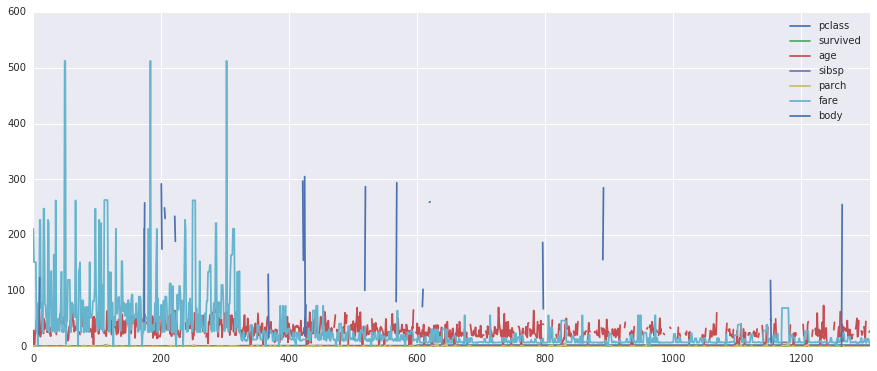

In [105]:
titanic.plot(figsize=(15, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120cfeba8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121348240>]], dtype=object)

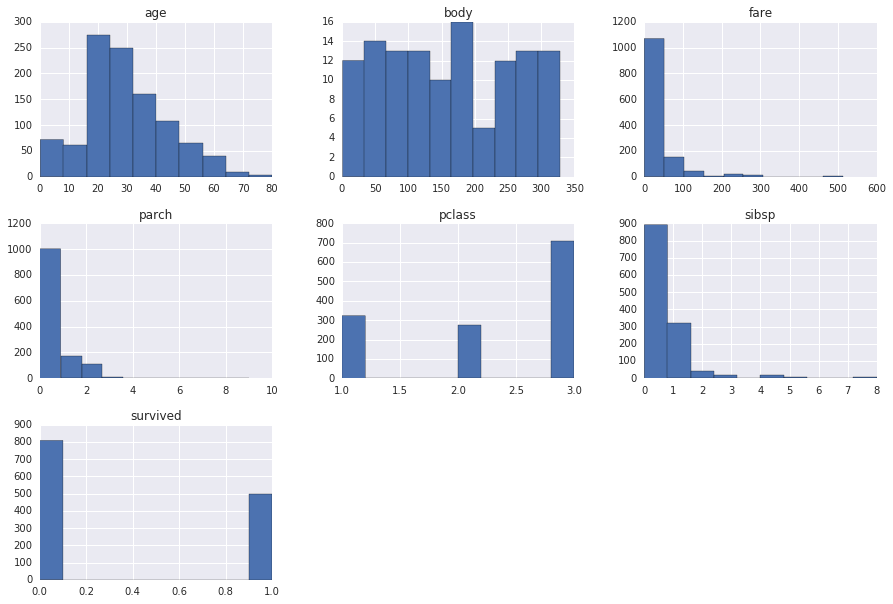

In [106]:
titanic.hist(figsize=(15, 10))

sex
female    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
male      [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

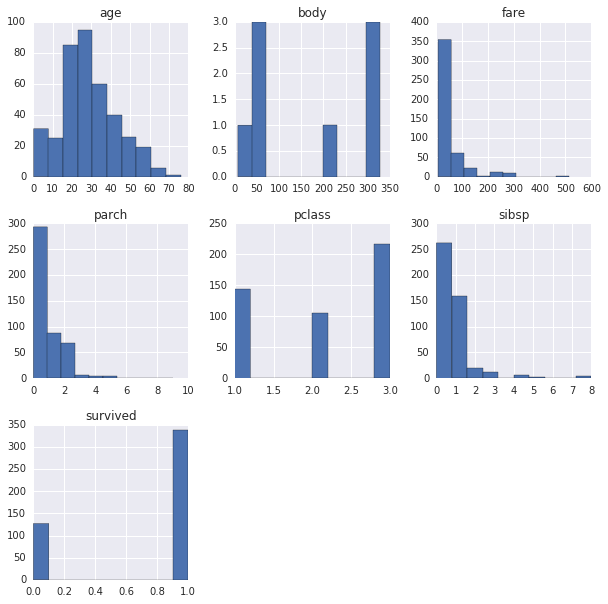

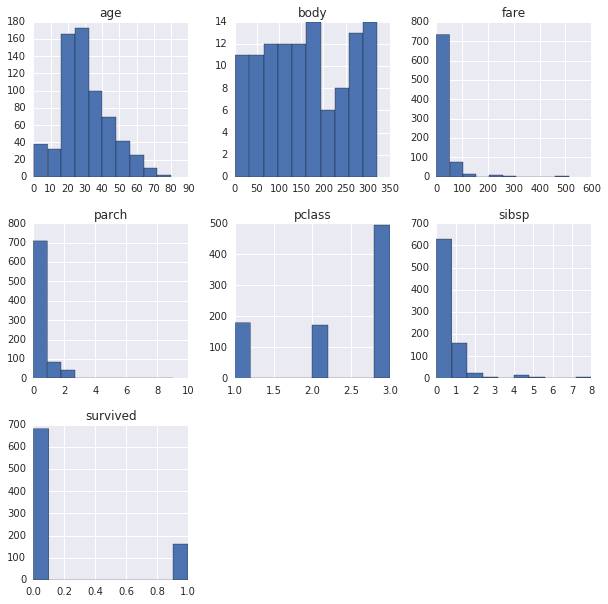

In [107]:
titanic.groupby('sex').hist(figsize=(10, 10))

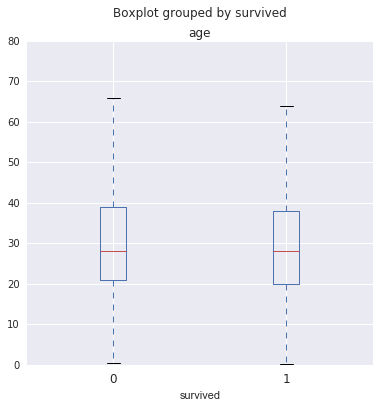

In [108]:
titanic.boxplot(column=['age'], by='survived', figsize=(6, 6))

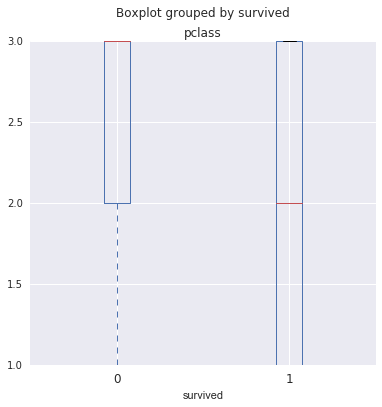

In [109]:
titanic.boxplot(column=['pclass'], by='survived', figsize=(6, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122954668>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1240b3710>]], dtype=object)

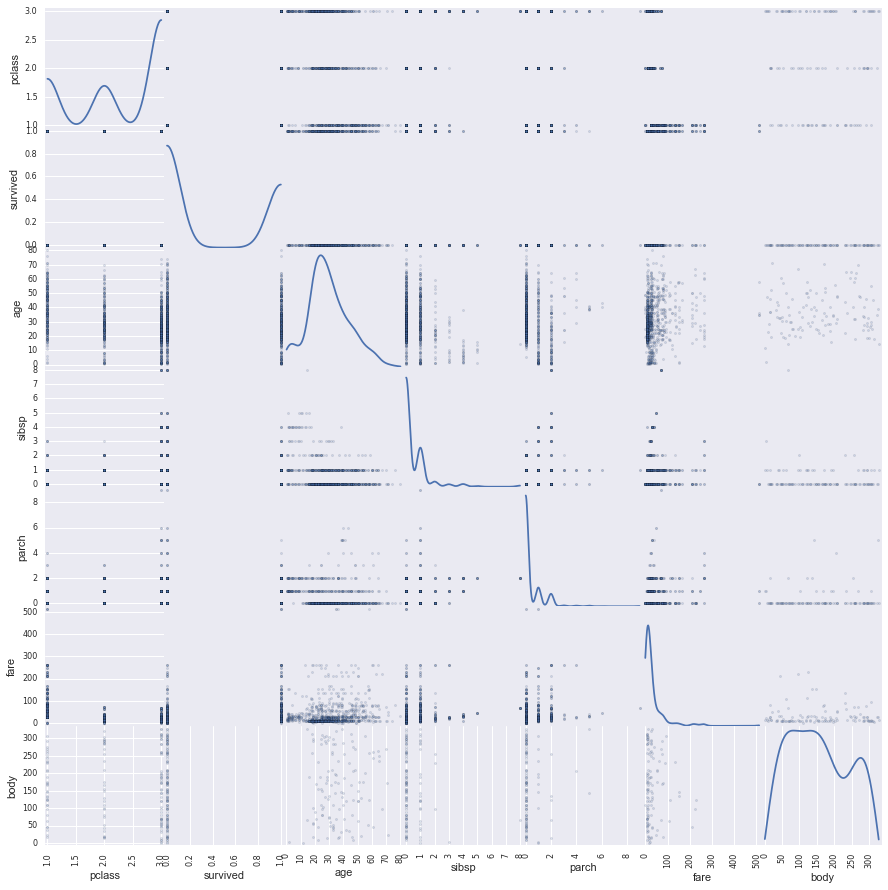

In [110]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(titanic, alpha=0.2, figsize=(15, 15), diagonal='kde')

In [103]:
import seaborn as sns
# Recommended for graph plotting in Python
# Need download not include in Anaconda

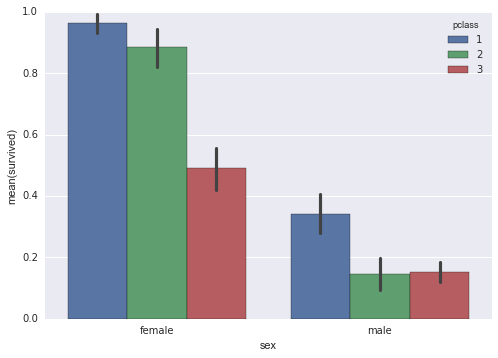

In [111]:
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic)

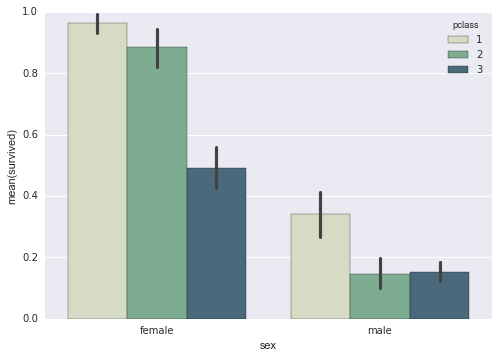

In [112]:
sns.barplot(x="sex", y="survived", hue="pclass", data=titanic, palette=sns.cubehelix_palette(4, start=0.5, rot=-.75))

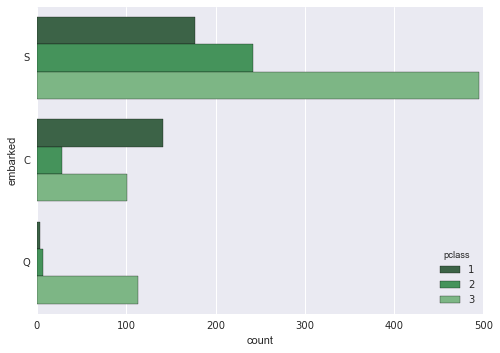

In [113]:
sns.countplot(y="embarked", hue="pclass", data=titanic, palette="Greens_d");

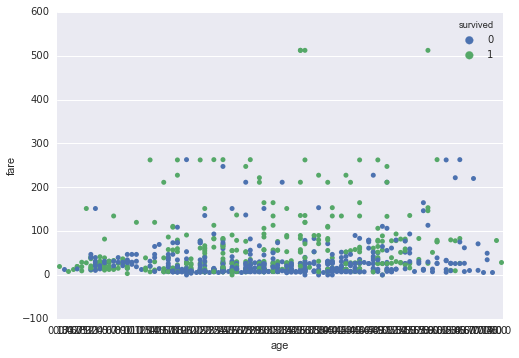

In [114]:
sns.stripplot(x=titanic.age, y=titanic.fare, hue=titanic.survived)

TypeError: 'FacetGrid' object is not iterable

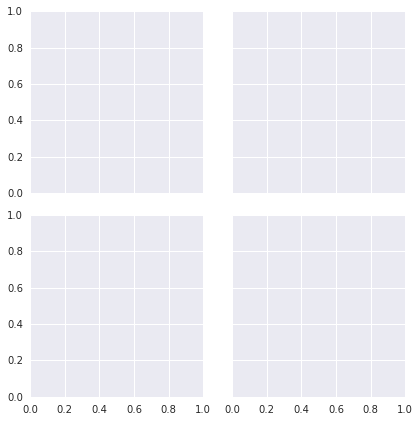

In [120]:
plt.hist(sns.FacetGrid(titanic, row = 'sex', col = 'survived'), 'age')

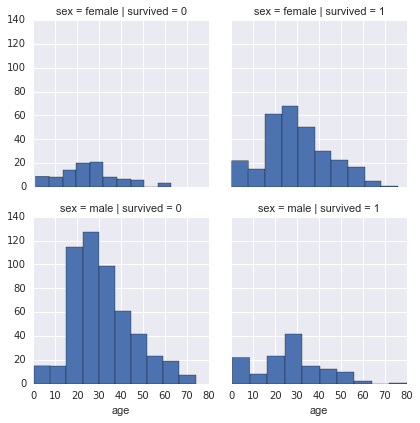

In [115]:
g = sns.FacetGrid(titanic, row="sex", col="survived")
g.map(plt.hist, 'age')  # map function with data

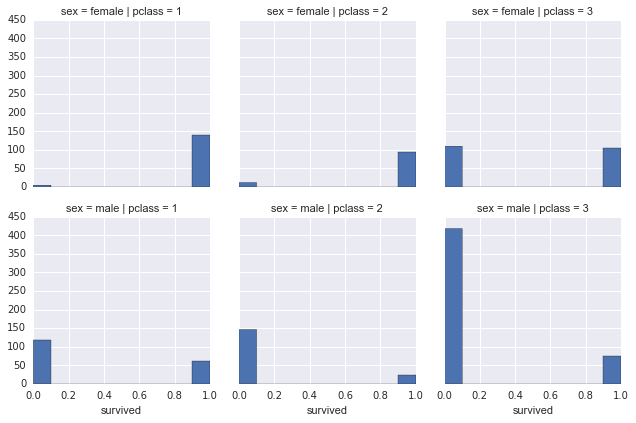

In [121]:
g = sns.FacetGrid(titanic, row="sex", col="pclass")
g.map(plt.hist, 'survived')

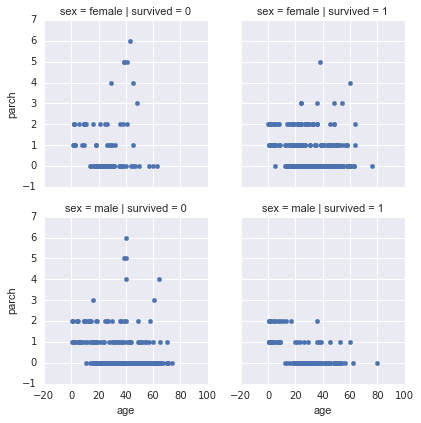

In [122]:
g = sns.FacetGrid(titanic, row="sex", col="survived")
g.map(plt.scatter, 'age', 'parch')

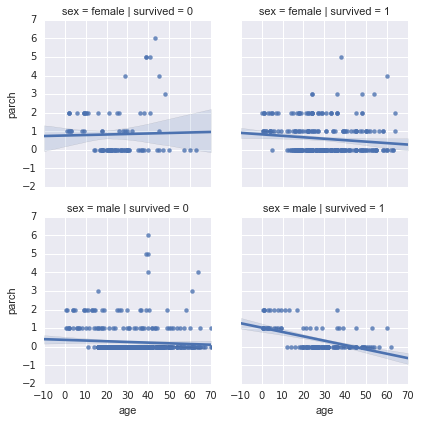

In [123]:
g = sns.FacetGrid(titanic, row="sex", col="survived")
g.map(sns.regplot, 'age', 'parch')

## Exercises

### Exercise 1

สร้าง Series ของค่าไฟปี 2015 โดยแต่ละเดือนมีค่าไฟตามนี้

* January มียอด 3,000 บาท
* February มียอด 3,512 บาท
* February มียอด 1,900 บาท
* April มียอด 1,988 บาท
* May มียอด 3,012 บาท
* June มียอด 2,912 บาท
* July มียอด 3,100 บาท
* August มียอด 2,501 บาท
* September มียอด 3,309 บาท
* October มียอด 2,087 บาท
* November มียอด 4,223 บาท
* December มียอด 3,566 บาท

ให้ใช้เดือนเป็น index และยอดเงินเป็นค่าของแต่ละ index

In [145]:
# your code here
expense = {
    'January' : 3000,
     'February' : 3512,
     'March' : 1900,
     'April' : 1988,
     'May' : 3012,
     'June' : 2912,
     'July' : 3100,
     'August' : 2501,
     'September' : 3309,
     'October' : 2087,
     'November' : 4223,
     'December': 3566
    }
month = pd.Series(expense)

รวมทั้งปีแล้วต้องจ่ายค่าไฟเท่าไหร่? เฉลี่ยเดือนละเท่าไหร่?

In [156]:
month.sum()

35110

In [155]:
month.mean()

2925.8333333333335

เดือนไหนจ่ายค่าไฟเยอะสุด?

In [149]:
month.max()
month[month == 4223]

November    4223
dtype: int64

### Exercise 2

สร้าง DataFrame ข้อมูลเงินเดือนของพนักงาน

คนที่ 1

* ชื่อ William
* อาชีพ Chief Investment Officer
* เงินเดือนทั้งปี 507,831.60 USD

คนที่ 2

* ชื่อ Ellen
* อาชีพ Asst Med Examiner
* เงินเดือนทั้งปี 279,311.10 USD

คนที่ 3

* ชื่อ Barbara
* อาชีพ Dept Head
* รายได้ทั้งปี 307,580.34 USD

In [164]:
# your code here

emp_data_dict = {
    'name': ['Willim', 'Ellen', 'Barbara'],
    'occupation': ['Chief Investment Officer', 'Asst Med Examiner', 'Dept Head'],
    'salary': [507831.60, 279311.10, 307580.34]
}
df = pd.DataFrame(emp_data_dict)  # Create dataframe form definded data dict
df

,name,occupation,salary
0,Willim,Chief Investment Officer,507831.60
1,Ellen,Asst Med Examiner,279311.10
2,Barbara,Dept Head,307580.34


ใครได้รายได้ต่อปีเยอะที่สุด?

In [167]:
# your code here
print(df.salary.max())
df[df.salary == df.salary.max()]

507831.6


,name,occupation,salary
0,Willim,Chief Investment Officer,507831.6


In [169]:
df.sort_values(by = 'salary', ascending = False)

,name,occupation,salary
0,Willim,Chief Investment Officer,507831.60
2,Barbara,Dept Head,307580.34
1,Ellen,Asst Med Examiner,279311.10


ใครได้รายได้ต่อปีเกิน 300,000 USD บ้าง?

In [168]:
# your code here
df[df.salary >= 300000]

,name,occupation,salary
0,Willim,Chief Investment Officer,507831.60
2,Barbara,Dept Head,307580.34


### Exercise 3

เลือกข้อมูล Amazon review ที่เป็น 5-core จาก http://jmcauley.ucsd.edu/data/amazon/ ของ Julian McAuley

```
reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
asin - ID of the product, e.g. 0000013714
reviewerName - name of the reviewer
helpful - helpfulness rating of the review, e.g. 2/3
reviewText - text of the review
overall - rating of the product
summary - summary of the review
unixReviewTime - time of the review (unix time)
reviewTime - time of the review (raw)
```

**หมายเหตุ:** ข้อมูลนี้ใช้ทางด้านการวิจัยเท่านั้น :)

In [ ]:
# your code here

In [ ]:
df.head()

In [ ]:
df.to_csv('data/reviews_Digital_Music_5.csv')

In [ ]:
df.tail()

In [ ]:
df['unixReviewTime'] = pd.to_datetime(df['unixReviewTime'], unit='s')

In [ ]:
df.info()

In [ ]:
df.unixReviewTime.dt.dayofweek.head()

In [ ]:
df.unixReviewTime.dt.weekofyear.head()

In [ ]:
df.unixReviewTime.dt.quarter.head()

เก็บข้อมูล quarter ของแต่ละ review ในคอลัมภ์ใหม่ชื่อ quarter

In [ ]:
# your code here

เลือกข้อมูลที่มี overall rating 5 เฉพาะวันจันทร์ และมีคำว่า love ใน review

In [ ]:
# your code here

หาสินค้าที่มีคนรีวีวในวันที่มีคนรีวีวมากที่สุด

In [ ]:
# your code here

หารีวีวของสินค้า 3 อันดับแรกที่มีคนรีวีวมากที่สุด

In [ ]:
# your code here

หาค่า rating เฉลี่ยของแต่ละสินค้า

In [ ]:
# your code here

หาค่า rating ของผู้ใช้แต่ละคน

In [ ]:
# your code here

หาค่า rating เฉลี่ยของแต่ละวันใน 1 อาทิตย์

In [ ]:
# your code here

หาค่า standard deviation ของ rating ของแต่ละสินค้า

In [ ]:
# your code here

กราฟแสดงจำนวนคนที่มารีวีว

In [ ]:
# your code here

กราฟเปรียบเทียบค่า rating เฉลี่ยในแต่ละวันของอาทิตย์ระหว่างปี 2013 และ 2014

In [ ]:
# your code here

กราฟเปรียบเทียบจำนวนรีวีวต่อวันของเดือนระหว่างปี 2012, 2013 และ 2014

In [ ]:
# your code here